# Balancing datasets

At times, you will be given imbalanced datasets, where there will be more instances of class 1 than class 2. To avoid the imbalance negatively affecting performance, it is important to even out the data. This can be done by randomly undersampling the majority class, or oversampling the minority class.

Run the code below.

In [1]:
# The usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.preprocessing import RobustScaler

In [5]:
data = pd.DataFrame(columns=["y","x1", "x2"], data=[[1,5,6],[1,4,4],[1,4,5],
                                                    [2,7,8],[1,8,7], [1,5,7],
                                                    [2,4,2],[1,2,6], [1,7,5],
                                                    [1,2,9]
                                                   ])

data

,y,x1,x2
0,1,5,6
1,1,4,4
2,1,4,5
3,2,7,8
4,1,8,7
5,1,5,7
6,2,4,2
7,1,2,6
8,1,7,5
9,1,2,9


<details>
  <summary>Hint</summary>
  If this breaks, you might need to load a package...
</details>

As you can see, there are more of instances of 1's than 2's. Although the imbalance is easily visible in this dataset, it won't be in real life cases. Count and save class occurences.

In [7]:
count_class_1, count_class_2 = data.y.value_counts()

print('Class 1:', count_class_1)

print('Class 2:', count_class_2)

Class 1: 8
Class 2: 2


<details>
  <summary>Hint</summary>

Check out the [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method !
</details>
<details>
  <summary>View solution</summary>

```python
data.y.value_counts()
``` should do the trick !
</details>

Divide the dataset according to classes

In [15]:
data_class_1 = data[data['y']==1]

data_class_2 = data[data['y']==2]

In [16]:
data_class_1

,y,x1,x2
0,1,5,6
1,1,4,4
2,1,4,5
4,1,8,7
5,1,5,7
7,1,2,6
8,1,7,5
9,1,2,9


In [17]:
data_class_2

,y,x1,x2
3,2,7,8
6,2,4,2


<details>
  <summary>Hint</summary>
Maybe filter your dataframe based on the class value ?
</details>
<details>
  <summary>View solution</summary>

```python
data_class_1 = data[data['y'] == 1]
data_class_2 = data[data['y'] == 2]
```
</details>

## Undersampling 

Undersampling will downsize the majority class to the number of occurences in the minority class by random selection.

Use pandas' sample() method to sample from class 1 the same number of occurences as in class 2. Then, concatenate the undersampled class 1 data with the original class 2 data.

In [19]:
data_class_1.count()

y     8
x1    8
x2    8
dtype: int64

In [28]:
df_class_1_under = data_class_1.sample(n=data_class_2.count()['y'], random_state=1)

df_balanced_under = pd.concat([df_class_1_under, data_class_2])

df_balanced_under

,y,x1,x2
9,1,2,9
2,1,4,5
3,2,7,8
6,2,4,2


<details>
  <summary>Hint</summary>

The following pandas methods will be useful: `sample` and `concat`.
</details>
<details>
  <summary>View solution</summary>

```python
data_class_1_under = data_class_1.sample(count_class_2)
data_balanced_under = pd.concat([data_class_1_under, data_class_2], axis=0)
data_balanced_under
```
</details>

## Oversampling 

Oversampling will upsize the minority class to the number of occurences in the majority class by random duplication.

Go ahead, oversample and concatenate! Because you will add instances, the sample() method requires a specific parameter.

In [34]:
df_class_2_over = data_class_2.sample(n=data_class_1.count()['y'], replace=True)

df_balanced_over = pd.concat([data_class_1, df_class_2_over])

df_balanced_over

,y,x1,x2
0,1,5,6
1,1,4,4
2,1,4,5
4,1,8,7
5,1,5,7
7,1,2,6
8,1,7,5
9,1,2,9
6,2,4,2
6,2,4,2


In [33]:
df_class_2_over

,y,x1,x2
6,2,4,2
3,2,7,8
6,2,4,2
3,2,7,8
3,2,7,8
3,2,7,8
3,2,7,8
6,2,4,2


<details>
  <summary>Hint</summary>

Make use of `sample` and `concat` as well !
</details>
<details>
  <summary>View solution</summary>

```python
data_class_2_over = data_class_2.sample(count_class_1, replace=True)
data_balanced_over = pd.concat([data_class_1, data_class_2_over], axis=0)
data_balanced_over
```
</details>

# Standardization

Machine Learning algorithms such as SVMs assume that all features have a somewhat normal distribution, centered around zero and a similar variance. However, that is rarely the case in wild datasets. A feature that has a significantly larger variance might dominate others and prevent the model to learn from them. 

Standaridization transforms each feature by removing its mean value (u) and dividing it by its standard deviation (s). As such, it is centered at zero.

z = (x - u) / s

Standardization can be done using Sklearn's "preprocessing" package and its method "StandardScaler". 

- Initiate default Scaler
- Fit data
- Transform data
- Print scaled data

In [36]:
from sklearn.preprocessing import StandardScaler

data = [[0,0],
        [1,1],
        [2,2]]

scaler = StandardScaler()
print(scaler.fit(data))
print(scaler.mean_)
print(scaler.transform(data))

StandardScaler(copy=True, with_mean=True, with_std=True)
[1. 1.]
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


<details>
  <summary>Hint</summary>

If you don't know the syntax, check out the documentation !
</details>
<details>
  <summary>View solution</summary>

```python
from sklearn.preprocessing import StandardScaler

data = [[0,0],
        [1,1],
        [2,2]]

scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data
```
</details>

The scaler is now stored in memory and can reproduce the equivalent transformation on new data. Transform the new data to verify it does the right transformation.

In [37]:
new_data = [[1,1]]

print(scaler.transform(new_data))

[[0. 0.]]


<details>
  <summary>View solution</summary>

```python
new_data = [[1,1]]
scaler.transform(new_data)
```
</details>

# Scaling to range

Another transformation option is to scale to a range. The advantage of this method is its resistance to very small standard deviations. It also preserves zero entries in sparse datasets. There are two ways to scale to a range in Sklearn:

- MinMaxScaler transforms to a range [0,1]
- MaxAbsScaler transforms to a range [-1,1]

Below, use MinMaxScaler to transform the data.

In [39]:
from sklearn.preprocessing import MinMaxScaler

data = [[0,0],
        [1,1],
        [2,2]]


mmscaler = MinMaxScaler()
print(mmscaler.fit(data))
print(mmscaler.transform(data))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


<details>
  <summary>Hint</summary>
    
    You know it: documentation 😃 ! 
</details>
<details>
  <summary>View solution</summary>

```python
from sklearn.preprocessing import MinMaxScaler

data = [[0,0],
        [1,1],
        [2,2]]

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(data)

min_max_scaled_data = min_max_scaler.transform(data)

min_max_scaled_data
```
</details>

MaxAbsScaler works the same way but transforms the data to a range [-1,1]. That transformation is better suited to data already centered at zero (standardized).

Below, standardize the data before scaling it in the range [-1,1].

In [41]:
from sklearn.preprocessing import MaxAbsScaler

data = [[-1,-1],
        [1,1],
        [3,3]]

scaler = StandardScaler()
print(scaler.fit(data))
std_data = scaler.transform(data)
print(std_data)

mascaler = MaxAbsScaler()
print(mascaler.fit(std_data))
print(mascaler.transform(std_data))

StandardScaler(copy=True, with_mean=True, with_std=True)
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]
MaxAbsScaler(copy=True)
[[-1. -1.]
 [ 0.  0.]
 [ 1.  1.]]


<details>
  <summary>Hint</summary>
    
    No other option than checking the documentation 😃
</details>
<details>
  <summary>View solution</summary>

```python
from sklearn.preprocessing import MaxAbsScaler

data = [[-1,-1],
        [1,1],
        [3,3]]

standardizer = StandardScaler()
standardizer.fit(data)
standardized_data = standardizer.transform(data)

max_abs_scaler = MaxAbsScaler()
max_abs_scaler.fit(standardized_data)
max_abs_scaled_data = max_abs_scaler.transform(standardized_data)

max_abs_scaled_data
```
</details>

# Dealing with outliers

In the presence of outliers, standard scaling would not support the abnormally extreme data points. Sklearn's RobustScaler offers a more robust solution for such datasets.

Instead of removing the mean which would be affected by the outliers, it focuses on the median. It then scales the data according to the Interquartile Range (IQR). 

If the data was to be split into 4 quarters, the IQR represents the 2nd and 3rd quarters. By excluding the outermost quarters(1st and 4th), the algorithm intends to exclude the outliers.

RobustScaler uses the IQR by default but the range can be set manually.

Use RobustScaler to transform the data.

In [45]:
from sklearn.preprocessing import RobustScaler

data = [[1,1],
        [2,2],
        [3,999]]

rscaler = RobustScaler()
rscaler.fit(data)
print(rscaler)
print(rscaler.center_)
r_data = rscaler.transform(data)
print(r_data)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
[2. 2.]
[[-1.         -0.00200401]
 [ 0.          0.        ]
 [ 1.          1.99799599]]


<details>
  <summary>Hint</summary>
    
By repeating the same hint over and over it's not even a hint anymore 😃 ! Look at this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)
</details>
<details>
  <summary>View solution</summary>

```python
from sklearn.preprocessing import RobustScaler

data = [[1,1],
        [2,2],
        [3,999]]
r_scaler = RobustScaler()
r_scaler.fit(data)
r_scaler.transform(data)
```
</details>

Do the same thing but set a manual range to exclude the extreme fifths of the dataset. What is the transformed value of the outlier?

In [46]:
quantile_range=(25.0, 75.0)

data = [[1,1],
        [2,2],
        [3,999]]

rscaler2 = RobustScaler(copy=True, quantile_range=(20.0, 80.0), with_centering=True, with_scaling=True)
rscaler2.fit(data)
print(rscaler2.center_)
r_data2 = rscaler2.transform(data)
print(r_data2)

[2. 2.]
[[-0.83333333 -0.00167001]
 [ 0.          0.        ]
 [ 0.83333333  1.66499666]]


<details>
  <summary>View solution</summary>

```python
manual_r_scaler = RobustScaler(quantile_range=(20.0,80.0))
manual_r_scaler.fit(data)
manual_r_scaler.transform(data)
```
</details>

# Encoding Categorical Features

Run the code below.

In [57]:
import pandas as pd

df = pd.DataFrame(columns=["target", "features"], 
                  data=[["a","u"],["b","s"],["a","s"],["c","r"]])
df

,target,features
0,a,u
1,b,s
2,a,s
3,c,r


In certain cases, targets and/or features will be letters. Before training a Machine Learning algorithm, you will need to convert them to numbers.

When dealing with the targets, you can use Sklearn's LabelEncoder. Do so below.

In [58]:
from sklearn.preprocessing import LabelEncoder

le_target = LabelEncoder()
le_target.fit(df['target'])
list(le_target.classes_)
df['target']=le_target.transform(df['target'])

df

,target,features
0,0,u
1,1,s
2,0,s
3,2,r


<details>
  <summary>Hint</summary>

[This one](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) is important to know !    
</details>
<details>
  <summary>View solution</summary>

```python
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target_encoded = le.fit_transform(df['target'])
target_encoded
```
</details>

The same could be executed on the features, but it may negatively affect the accuracy of the classifier. 

Taking the example of our dataframe, [u,s,s,r] could be transformed to [1,2,2,3]. A Machine Learning algorithm could wrongly consider that 1 and 3 are more distant from one another than 1 and 2, take that into consideration, and create an unwanted distortion.

To avoid such phenomenon, it is better to create multiple binary features. This can be done with pandas' get_dummies. Use it to transform the features.

In [61]:
feature_encoded = pd.get_dummies(df['features'])

feature_encoded

,r,s,u
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0


<details>
  <summary>Hint</summary>

Check out [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
</details>
<details>
  <summary>View solution</summary>

```python
feature_encoded = pd.get_dummies(df.features)
feature_encoded
```
</details>

# Binning

Binning is the process of turning continuous data into discrete data according to sections (bins). For example, in a dataset constituted of people's ages, you may want to consider age groups.

Run the code below.

In [62]:
ages = pd.DataFrame(columns=["age"], 
                  data=([[13],[15],[18],[19],[20],[22],[23],[23]]))

ages

,age
0,13
1,15
2,18
3,19
4,20
5,22
6,23
7,23


To part the data, you can use panda's "cut". Use it to cut the following age data into two bins "teens" and "adults".

In [65]:
ages['group'] = pd.cut(ages['age'],bins=[0, 12, 20, 99], labels=['Child', 'Teen', 'Adult'])
ages

,age,group
0,13,Teen
1,15,Teen
2,18,Teen
3,19,Teen
4,20,Teen
5,22,Adult
6,23,Adult
7,23,Adult


<details>
  <summary>Hint</summary>

Check the [cut](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html) method
</details>
<details>
  <summary>View solution</summary>

```python
ages['group'] = pd.cut(x = ages['age'], bins=[12,20,25], labels=['teen', 'adult'])
ages
```
</details>

# Model Building

Time to check out the difference in performance between raw and standardized data. You will be using breast cancer data. Run the code below to import.

In [66]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

Train an SVM, cross validate and check accuracy.  
Notes: 
- we will study cross validation in more depth in challenge 2 (the next one)
- we will study SVM in more depth in challenges 4, 5 and 6. You can think of it as a classifier for now, and use the typical scikit models' method.

In [81]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [76]:
X.size

17070

In [77]:
y.size

569

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

model = svm.LinearSVC()
model.fit(X,y)
scores = cross_val_score(model, X, y)

scores.mean()

C:\Users\Le Wagon 1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Le Wagon 1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Le Wagon 1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Le Wagon 1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Le Wagon 1

0.9191590086326928

<details>
  <summary>Hint</summary>
    
Check out the [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) documentation for cross validating.
</details>
<details>
  <summary>View solution</summary>

```python
from sklearn.model_selection import cross_val_score
from sklearn import svm

model = svm.SVC()
scores = cross_val_score(model, X, y, cv=3)
scores.mean()
```
</details>

Now, use StandardScaler to standardize the data before training an SVM. Cross validate and check accuracy.

In [85]:
scaler = StandardScaler()
print(scaler.fit(X))
print(scaler.mean_)
X=scaler.transform(X)
print(scaler.transform(X))

model2 = svm.LinearSVC()
model2.fit(X,y)
scores = cross_val_score(model2, X, y)

scores.mean()

StandardScaler(copy=True, with_mean=True, with_std=True)
[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
[[ -3.70076966  -4.97130967  -3.73591408 ...  33.21636394  39.80624701
  102.6893221 ]
 [ -3.49265638  -4.57112333  -3.71877809 ...  14.80753207  -8.6383861
   10.93044688]
 [ -3.56364075  -4.38267293  -3.72369832 ...  28.02294034  13.94817164
    6.50833241]
 ...
 [ -3.81289271  -4.01281194  -3.76051525 ...   4.55979443 -22.56196515
  -22.29682989]
 [ -3.49023646  -3.94512142  -3.70656233 ...  33.12362423  26.3537665
  118.35097751]
 [ -4.52596303  -4.20451148  -3.86295793 ... -

C:\Users\Le Wagon 1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Le Wagon 1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9631021999443052

<details>
  <summary>View solution</summary>

```python
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
model = svm.SVC()
scores = cross_val_score(model, X_scaled, y, cv=3)
scores.mean()
```
</details>

# Challenge

Train a model of 90+% accuracy with the data below. It has a number of irregularities that need to be dealt with prior to training. This section is not guided on purpose. Not because we are mean, but because you now have all the tools to do it on your own 💪 !

In [2]:
data = pd.read_csv("data/data.csv")

data

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,a
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,a
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,a
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,a
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680,c
162,12.85,3.27,2.58,22.0,106,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570,c
163,12.96,3.45,777.00,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675,c
164,13.78,2.76,2.30,22.0,15,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615,c


In [3]:
data['target'].value_counts()

b    71
a    59
c    36
Name: target, dtype: int64

In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,13.603373,2.455422,168.933735,19.824096,97.969880,66.721566,140.655000,0.839518,1.800060,11.615181,1.004072,9.366145,1393.608434
std,6.943012,2.224133,2072.581309,8.003819,18.875485,777.353917,1784.982434,6.029905,1.734921,85.958990,0.382150,77.873490,7740.327755
min,11.030000,0.740000,0.100000,0.200000,3.000000,0.980000,0.100000,0.130000,0.410000,0.110000,0.480000,0.230000,10.000000
25%,12.332500,1.540000,2.202500,17.025000,88.000000,1.835000,1.330000,0.260000,1.252500,3.050000,0.860000,2.142500,495.000000
50%,13.010000,1.810000,2.360000,19.000000,98.000000,2.435000,2.245000,0.320000,1.620000,4.475000,1.005000,2.835000,660.000000
75%,13.687500,2.982500,2.575000,21.500000,107.000000,2.850000,2.907500,0.430000,1.977500,5.737500,1.127500,3.197500,1031.250000
max,99.990000,25.000000,26700.000000,111.000000,162.000000,10000.000000,23000.000000,78.000000,18.000000,1111.000000,5.000000,1000.000000,99999.000000


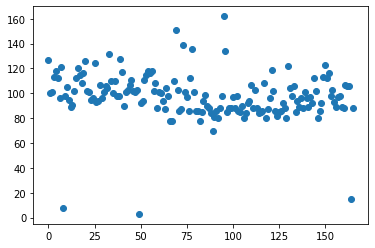

In [118]:
plt.scatter(data.index.values, data['4'])

In [6]:
#Balancing
count_class_b, count_class_a, count_class_c = data['target'].value_counts()
count_class_b
count_class_a
count_class_c

36

In [ ]:
#from scipy import stats
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [5]:
# Target

le_target = LabelEncoder()
y = le_target.fit_transform(data['target'])
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [7]:
#Nettoyage et scaling

X = data.iloc[:,0:13]

# Scale X
rscaler = RobustScaler()
rscaler.fit(X)
Xscaled = rscaler.transform(X)



In [12]:
# Create model

# TRAIN MODEL
model = svm.SVC(C=3)
scores = cross_val_score(model, Xscaled, y,  cv=8)
scores.mean()

C:\Users\Le Wagon 1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Le Wagon 1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Le Wagon 1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

0.8671636477557529

<details>
  <summary>Hint</summary>

Follow these steps: 
- Balance the dataset
- Encode target
- Scale for outliers
- Train model

</details>
<details>
  <summary>View solution</summary>

```python
#BALANCING THE DATASET

# Section data according to target
data_target_a = data[data['target'] == "a"]
data_target_b = data[data['target'] == "b"]
data_target_c = data[data['target'] == "c"]

# Count occurences of each target
count_target_a = data_target_a.target.value_counts()
count_target_b = data_target_b.target.value_counts()
count_target_c = data_target_c.target.value_counts()

print(count_target_a)
print(count_target_b)
print(count_target_c)

# Undersample the majoriti class
data_target_b_under = data_target_b.sample(count_target_a.item())

# Oversample the minority class
data_target_c_over = data_target_c.sample(count_target_a.item(), replace = True)

# Concatenate balanced data
data_balanced = pd.concat([data_target_c_over,data_target_b_under, data_target_a], axis=0)

# Visualize balanced data target counts
data_balanced.target.value_counts()


# ENCODING TARGET

le = LabelEncoder()
y = le.fit_transform(data_balanced['target'])
print(y)

# SCALING FOR OUTLIERS

# Make X
X = data_balanced.iloc[:,0:13]

# Scale X
r_scaler = RobustScaler()
r_scaler.fit(X)
scaled_data = r_scaler.transform(X)


# TRAIN MODEL
model = svm.SVC()
scores = cross_val_score(model, scaled_data, y, cv=5)
scores.mean()
```
</details>